<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">

# Simple Linear Regression with Sacramento Real Estate Data

_Authors: Matt Brems, Sam Stack, Justin Pounders_

---

In this lab you will hone your exploratory data analysis (EDA) skills and practice constructing simple linear regressions using a data set on Sacramento real estate sales.  The data set contains information on qualities of the property, location of the property, and time of sale.

### 1. Read in the Sacramento housing data set.

In [557]:
# Mask for the file location
sac_csv = './datasets/sacramento_real_estate_transactions.csv'

In [558]:
# Import essential libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
from sklearn.linear_model import LinearRegression

In [559]:
# Read the csv file and assigned to variable df
df = pd.read_csv(sac_csv)

In [560]:
# Check the size of the df
df.shape

(985, 12)

In [561]:
# Inspect the first 5 rows of the df
df.head()

,street,city,zip,state,beds,baths,sq__ft,type,sale_date,price,latitude,longitude
0,3526 HIGH ST,SACRAMENTO,95838,CA,2,1,836,Residential,Wed May 21 00:00:00 EDT 2008,59222,38.631913,-121.434879
1,51 OMAHA CT,SACRAMENTO,95823,CA,3,1,1167,Residential,Wed May 21 00:00:00 EDT 2008,68212,38.478902,-121.431028
2,2796 BRANCH ST,SACRAMENTO,95815,CA,2,1,796,Residential,Wed May 21 00:00:00 EDT 2008,68880,38.618305,-121.443839
3,2805 JANETTE WAY,SACRAMENTO,95815,CA,2,1,852,Residential,Wed May 21 00:00:00 EDT 2008,69307,38.616835,-121.439146
4,6001 MCMAHON DR,SACRAMENTO,95824,CA,2,1,797,Residential,Wed May 21 00:00:00 EDT 2008,81900,38.519470,-121.435768


### 2. Conduct exploratory data analysis on this data set. 

**Report any notable findings here and any steps you take to clean/process data.**

> **Note:** These EDA checks should be done on every data set you handle. If you find yourself checking repeatedly for missing/corrupted data, it might be beneficial to have a function that you can reuse every time you're given new data.

#### 2.1 Check overall data quality

In [562]:
# Check bad data
df.isnull().sum()

street       0
city         0
zip          0
state        0
beds         0
baths        0
sq__ft       0
type         0
sale_date    0
price        0
latitude     0
longitude    0
dtype: int64

In [563]:
# Check datatype
df.dtypes

street        object
city          object
zip            int64
state         object
beds           int64
baths          int64
sq__ft         int64
type          object
sale_date     object
price          int64
latitude     float64
longitude    float64
dtype: object

#### 2.2 Check each individual column data quality

##### 2.2.1 - Check city typo
> Good!

In [564]:
#1. Check typo in City
# city_check = df['city'].unique()
# sorted(city_check)

##### 2.2.2 - Check zip code
> Goog!

In [565]:
# df['zip'].unique()

##### 2.2.3 - Check state typo
> Found one problemetic data with issues with state, sq_ft (negative), price, (negative), and reversed lat and long.

> After consideration, this row is deleted

In [566]:
#2. Check typo in State
state_check = df['state'].unique()
sorted(state_check)
# One typo below to fix

['AC', 'CA']

In [567]:
df[df['state'] == 'AC']

,street,city,zip,state,beds,baths,sq__ft,type,sale_date,price,latitude,longitude
703,1900 DANBROOK DR,SACRAMENTO,95835,AC,1,1,-984,Condo,Fri May 16 00:00:00 EDT 2008,-210944,-121.503471,38.668433


In [568]:
df.drop([703], inplace = True)

In [569]:
df = df.reset_index()

##### 2.2.4 Bed/Bath/SQ__FT
> many entries has value of 0

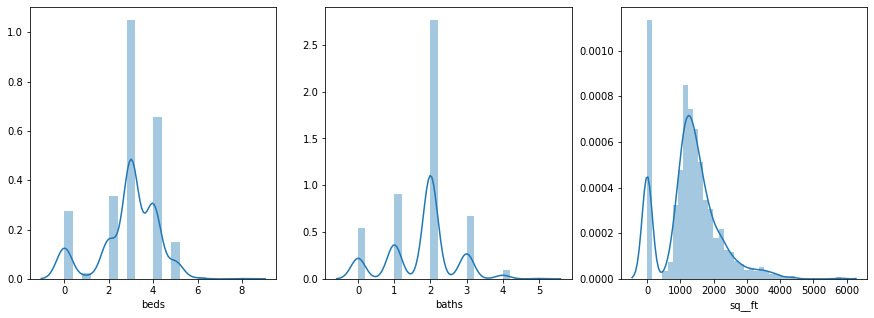

In [570]:
plt.figure(figsize = (15,5))

plt.subplot(131)
sns.distplot(df['beds'])
plt.subplot(132)
sns.distplot(df['baths'])
plt.subplot(133)
sns.distplot(df['sq__ft']);

##### 2.2.5 Check Lat Long

> Good!

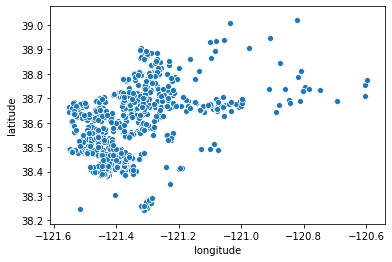

In [571]:
sns.scatterplot(df['longitude'], df['latitude'])

In [572]:
# Convert zip from int64 to object
df['zip'] = df['zip'].apply(lambda x: str(x))

In [573]:
# Create a temporary column with bool variable to check if the zip codes are all 5-digit long
# If the value is 5 digit long, return 0, otherwise, return 1 (for problematic zipcodes)
df['len_zip'] = df['zip'].apply(lambda x: len(x) != 5)

In [574]:
# Find the total number of problematic zipcodes
df['len_zip'].sum()

0

**Based on the above evaluation, the zip codes are all in good format. No Issue!**

In [575]:
# Delete the temporary column
df.drop(columns = 'len_zip', inplace = True)

In [576]:
# Check to make sure the temp column is dropped
df.head()

,index,street,city,zip,state,beds,baths,sq__ft,type,sale_date,price,latitude,longitude
0,0,3526 HIGH ST,SACRAMENTO,95838,CA,2,1,836,Residential,Wed May 21 00:00:00 EDT 2008,59222,38.631913,-121.434879
1,1,51 OMAHA CT,SACRAMENTO,95823,CA,3,1,1167,Residential,Wed May 21 00:00:00 EDT 2008,68212,38.478902,-121.431028
2,2,2796 BRANCH ST,SACRAMENTO,95815,CA,2,1,796,Residential,Wed May 21 00:00:00 EDT 2008,68880,38.618305,-121.443839
3,3,2805 JANETTE WAY,SACRAMENTO,95815,CA,2,1,852,Residential,Wed May 21 00:00:00 EDT 2008,69307,38.616835,-121.439146
4,4,6001 MCMAHON DR,SACRAMENTO,95824,CA,2,1,797,Residential,Wed May 21 00:00:00 EDT 2008,81900,38.519470,-121.435768


### The 'sale_date' is in string format. Convert to Pandas DateTime format for easy operation.

In [577]:
# Add a new column of pandas datetime format
df['sale_date_n'] = pd.to_datetime(df['sale_date'])

/Users/kaizhao/anaconda3/lib/python3.7/site-packages/dateutil/parser/_parser.py:1206: UnknownTimezoneWarning: tzname EDT identified but not understood.  Pass `tzinfos` argument in order to correctly return a timezone-aware datetime.  In a future version, this will raise an exception.
  category=UnknownTimezoneWarning)


In [578]:
# Add a new column of weekday name
df['week_day'] = df['sale_date_n'].dt.weekday_name

In [579]:
df.head()

,index,street,city,zip,state,beds,baths,sq__ft,type,sale_date,price,latitude,longitude,sale_date_n,week_day
0,0,3526 HIGH ST,SACRAMENTO,95838,CA,2,1,836,Residential,Wed May 21 00:00:00 EDT 2008,59222,38.631913,-121.434879,2008-05-21,Wednesday
1,1,51 OMAHA CT,SACRAMENTO,95823,CA,3,1,1167,Residential,Wed May 21 00:00:00 EDT 2008,68212,38.478902,-121.431028,2008-05-21,Wednesday
2,2,2796 BRANCH ST,SACRAMENTO,95815,CA,2,1,796,Residential,Wed May 21 00:00:00 EDT 2008,68880,38.618305,-121.443839,2008-05-21,Wednesday
3,3,2805 JANETTE WAY,SACRAMENTO,95815,CA,2,1,852,Residential,Wed May 21 00:00:00 EDT 2008,69307,38.616835,-121.439146,2008-05-21,Wednesday
4,4,6001 MCMAHON DR,SACRAMENTO,95824,CA,2,1,797,Residential,Wed May 21 00:00:00 EDT 2008,81900,38.519470,-121.435768,2008-05-21,Wednesday


_**Fun Fact:** Zip codes often have leading zeros — e.g., 02215 = Boston, MA — which will often get knocked off automatically by many software programs like Python or Excel. You can imagine that this could create some issues. _

### 3. Our goal will be to predict price. List variables that you think qualify as predictors of price in an SLR model. 

**For each of the variables you believe to be a valid potential predictor in an SLR model, generate a plot showing the relationship between the independent and dependent variables.**

### List of variables qualified as prediction for home price
1. beds/baths/sq_ft 
2. zip code
3. sale_date
4. week_day (maybe)

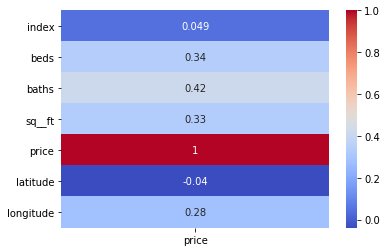

In [580]:
# Check the heatmap of correlation between price and other numerical variable
sns.heatmap(df.corr()[['price']], annot = True, cmap = 'coolwarm');

When you've finished cleaning or have made a good deal of progress cleaning, it's always a good idea to save your work.
```python
shd.to_csv('./datasets/sacramento_real_estate_transactions_Clean.csv')
```

### 4. Which variable would be the best predictor of Y in an SLR model? Why?

Given all the data are in the same region in May, 2008. The the best predictor will be square footage (a continuous variable) of the home.

### 5. Build a function that will take in two lists, `Y` and `X`, and return the intercept and slope coefficients that minimize SSE. 

`Y` is the target variable and `X` is the predictor variable.

- **Test your function on price and the variable you determined was the best predictor in Problem 4.**
- **Report the slope and intercept.**

In [581]:
# Function to replace 
def slr(X, y):
    X_hat = X.mean()
    y_hat = y.mean()
    X_std = X.std()
    y_std = y.std()
    r_xy = (((X-X_hat)/X_std) * ((y-y_hat)/y_std)).sum() / (len(X)-1)
    b_1 = r_xy * y_std / X_std
    b_0 = y_hat - b_1*X_hat    
    return b_0, b_1

In [582]:
# Testing a with the square footage
# Setup X and y
y = df['price']
X = df['sq__ft']

In [583]:
b_0, b_1 = slr(X, y)
print(f'The intercept of the model that minimize SSE is {b_0}')
print(f'The slope of the model that minimize SSE is {b_1}')

The intercept of the model that minimize SSE is 162938.7375609864
The slope of the model that minimize SSE is 54.15619752295756


### 6. Interpret the intercept. Interpret the slope.

**Intercept**: If the square footage of the property is 0, then I expect the price of the home to be $162,938.74

**Slope**: As the square footage of the property increase/decrease by one unit (sqft), then I expect the price of the property to increase/decrease by $54.16.

### 7. Give an example of how this model could be used for prediction and how it could be used for inference. 

**Be sure to make it clear which example is associated with prediction and which is associated with inference.**

#### 7.1 Example 1: Prediction

> Predicting the price of a property that is not in the database based on the square footage of the hourse. 

#### 7.2 Example 2: Inference

> Explaining why certain property in the provided data cost at those prices based on their square footage. 

### 8: [Bonus] Using the model you came up with in Problem 5, calculate and plot the residuals.

In [584]:
# Add a column with home price predicted with the squarefootage
df['price_slr_sqft'] = b_0 + b_1 * df['sq__ft']

In [585]:
# Check first five rows of the DataFrame
df.head()

,index,street,city,zip,state,beds,baths,sq__ft,type,sale_date,price,latitude,longitude,sale_date_n,week_day,price_slr_sqft
0,0,3526 HIGH ST,SACRAMENTO,95838,CA,2,1,836,Residential,Wed May 21 00:00:00 EDT 2008,59222,38.631913,-121.434879,2008-05-21,Wednesday,208213.318690
1,1,51 OMAHA CT,SACRAMENTO,95823,CA,3,1,1167,Residential,Wed May 21 00:00:00 EDT 2008,68212,38.478902,-121.431028,2008-05-21,Wednesday,226139.020070
2,2,2796 BRANCH ST,SACRAMENTO,95815,CA,2,1,796,Residential,Wed May 21 00:00:00 EDT 2008,68880,38.618305,-121.443839,2008-05-21,Wednesday,206047.070789
3,3,2805 JANETTE WAY,SACRAMENTO,95815,CA,2,1,852,Residential,Wed May 21 00:00:00 EDT 2008,69307,38.616835,-121.439146,2008-05-21,Wednesday,209079.817851
4,4,6001 MCMAHON DR,SACRAMENTO,95824,CA,2,1,797,Residential,Wed May 21 00:00:00 EDT 2008,81900,38.519470,-121.435768,2008-05-21,Wednesday,206101.226987


In [586]:
# Calculate Residual
y = df['price']
y_pred = df['price_slr_sqft']

In [587]:
resids = y_pred - y
resids[:3]

0    148991.318690
1    157927.020070
2    137167.070789
dtype: float64

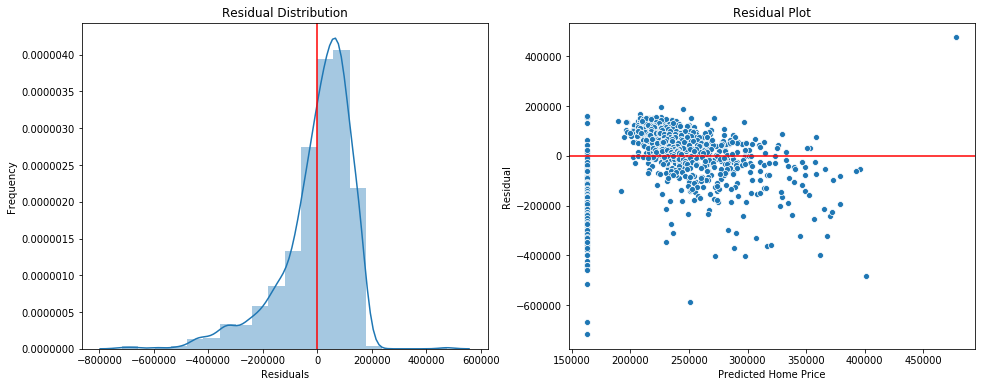

In [684]:
# Plot the residuals
plt.figure(figsize = (16,6))

# Figure 1 to test the nomality of the residual
plt.subplot(121)
sns.distplot(resids, bins = 20)
plt.title("Residual Distribution")
plt.ylabel("Frequency")
plt.xlabel("Residuals")
plt.axvline(0, c='red')

# Figure 2 to test the equality of the residuals
plt.subplot(122)
sns.scatterplot(y_pred, resids)
plt.axhline(0, c='red')
plt.title("Residual Plot")
plt.ylabel("Residual")
plt.xlabel("Predicted Home Price");

---

> The material following this point can be completed after the second lesson on Monday.

---

## Dummy Variables

---

It is important to be cautious with categorical variables, which represent distict groups or categories, when building a regression. If put in a regression "as-is," categorical variables represented as integers will be treated like *continuous* variables.

That is to say, instead of group "3" having a different effect on the estimation than group "1" it will estimate literally 3 times more than group 1. 

For example, if occupation category "1" represents "analyst" and occupation category "3" represents "barista", and our target variable is salary, if we leave this as a column of integers then barista will always have `beta*3` the effect of analyst.

This will almost certainly force the beta coefficient to be something strange and incorrect. Instead, we can re-represent the categories as multiple "dummy coded" columns.

### 9. Use the `pd.get_dummies` function to convert the `type` column into dummy-coded variables.

Print out the header of the dummy-coded variable output.

In [589]:
# Convert 'type' into dummy variables
type_dummy = pd.get_dummies(df['type'])

In [590]:
# Print the top 5 lines of the data
type_dummy.head()

,Condo,Multi-Family,Residential,Unkown
0,0,0,1,0
1,0,0,1,0
2,0,0,1,0
3,0,0,1,0
4,0,0,1,0


---

### A Word of Caution When Creating Dummies

Let's touch on precautions we should take when dummy coding.

**If you convert a qualitative variable to dummy variables, you want to turn a variable with N categories into N-1 variables.**

> **Scenario 1:** Suppose we're working with the variable "sex" or "gender" with values "M" and "F". 

You should include in your model only one variable for "sex = F" which takes on 1 if sex is female and 0 if sex is not female! Rather than saying "a one unit change in X," the coefficient associated with "sex = F" is interpreted as the average change in Y when sex = F relative to when sex = M.

| Female | Male | 
|-------|------|
| 0 | 1 | 
| 1 | 0 |
| 0 | 1 |
| 1 | 0 |
| 1 | 0 |
_As we can see a 1 in the female column indicates a 0 in the male column. And so, we have two columns stating the same information in different ways._

> Scenario 2: Suppose we're modeling revenue at a bar for each of the days of the week. We have a column with strings identifying which day of the week this observation occured in.

We might include six of the days as their own variables: "Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday". **But not all 7 days.**  

|Monday | Tuesday | Wednesday | Thursday | Friday | Saturday | 
|-------|---------|-----------|----------|--------|----------|
| 1     | 0       |0          |      0   |0       | 0        | 
| 0     | 1       |0          |      0   |0       | 0        | 
| 0     | 0       |1          |      0   |0       | 0        | 
| 0     | 0       |0          |      1   |0       | 0        | 
| 0     | 0       |0          |      0   |1       | 0        | 
| 0     | 0       |0          |      0   |0       | 1        | 
| 0     | 0       |0          |      0   |0       | 0        | 

_As humans we can infer from the last row that if its is not Monday, Tusday, Wednesday, Thursday, Friday or Saturday than it must be Sunday. Models work the same way._

The coefficient for Monday is then interpreted as the average change in revenue when "day = Monday" relative to "day = Sunday." The coefficient for Tuesday is interpreted in the average change in revenue when "day = Tuesday" relative to "day = Sunday" and so on.

The category you leave out, which the other columns are *relative to* is often referred to as the **reference category**.

### 10. Remove "Unkown" from four dummy coded variable dataframe and append the rest to the original data.

In [591]:
# remove 'unknown' column from type_dummy df
type_dummy.drop(columns = 'Unkown', inplace = True) 

In [592]:
# check if successfuly dropped the Unknown column
type_dummy.head()

,Condo,Multi-Family,Residential
0,0,0,1
1,0,0,1
2,0,0,1
3,0,0,1
4,0,0,1


In [593]:
# Append the columns back to df.
df = pd.concat([df, type_dummy], axis = 1)

In [594]:
df.drop(columns = 'index', inplace=True)

In [685]:
df.head(2)

,street,city,zip,state,beds,baths,sq__ft,type,sale_date,price,...,ROCKLIN,ROSEVILLE,SACRAMENTO,SHINGLE SPRINGS,SLOUGHHOUSE,WALNUT GROVE,WEST SACRAMENTO,WILTON,huge_houses,house_size_mix
0,3526 HIGH ST,SACRAMENTO,95838,CA,2,1,836,Residential,Wed May 21 00:00:00 EDT 2008,59222,...,0,0,1,0,0,0,0,0,0,1672
1,51 OMAHA CT,SACRAMENTO,95823,CA,3,1,1167,Residential,Wed May 21 00:00:00 EDT 2008,68212,...,0,0,1,0,0,0,0,0,0,3501


In [596]:
# Build a function to create dummy variables
def create_dummy(df, feature):
    dummy = pd.get_dummies(df[feature], drop_first = True)
    df = pd.concat([df, dummy], axis = 1)
#     df.drop(columns = 'index', inplace = True)
    return df

In [597]:
# Dummy the weekday
df = create_dummy(df, 'week_day')

In [598]:
# Dummy the City
df = create_dummy(df, 'city')

In [686]:
df.head(2)

,street,city,zip,state,beds,baths,sq__ft,type,sale_date,price,...,ROCKLIN,ROSEVILLE,SACRAMENTO,SHINGLE SPRINGS,SLOUGHHOUSE,WALNUT GROVE,WEST SACRAMENTO,WILTON,huge_houses,house_size_mix
0,3526 HIGH ST,SACRAMENTO,95838,CA,2,1,836,Residential,Wed May 21 00:00:00 EDT 2008,59222,...,0,0,1,0,0,0,0,0,0,1672
1,51 OMAHA CT,SACRAMENTO,95823,CA,3,1,1167,Residential,Wed May 21 00:00:00 EDT 2008,68212,...,0,0,1,0,0,0,0,0,0,3501


### 11. Build what you think may be the best MLR model predicting `price`. 

The independent variables are your choice, but *include at least three variables.* At least one of which should be a dummy-coded variable (either one we created before or a new one).

To construct your model don't forget to load in the statsmodels api:

```python
from sklearn.linear_model import LinearRegression

model = LinearRegression()
```

_I'm going to engineer a new dummy variable for 'HUGE houses'.  Those whose square footage is 3 (positive) standard deviations away from the mean._
```
Mean = 1315
STD = 853
Huge Houses > 3775 sq ft
```

In [600]:
# Add a new dummy variable for 'HUGE houses'
df['huge_houses'] = df['sq__ft'].apply(lambda x: 1 if x > 3775 else 0)

In [601]:
# create a new features that multiply the squarefootage, # bathrooms, and # bedrooms together.
df['house_size_mix'] = df['sq__ft'] * df['baths'] * df['beds']

In [687]:
df.head(2)

,street,city,zip,state,beds,baths,sq__ft,type,sale_date,price,...,ROCKLIN,ROSEVILLE,SACRAMENTO,SHINGLE SPRINGS,SLOUGHHOUSE,WALNUT GROVE,WEST SACRAMENTO,WILTON,huge_houses,house_size_mix
0,3526 HIGH ST,SACRAMENTO,95838,CA,2,1,836,Residential,Wed May 21 00:00:00 EDT 2008,59222,...,0,0,1,0,0,0,0,0,0,1672
1,51 OMAHA CT,SACRAMENTO,95823,CA,3,1,1167,Residential,Wed May 21 00:00:00 EDT 2008,68212,...,0,0,1,0,0,0,0,0,0,3501


In [605]:
# Dummy Features:
type_dummy = list(df['type'].unique())[:-1]
city_dummy = list(df['city'].unique())
city_dummy.remove('ANTELOPE') # when create the dummy, the function dropped 'ANTELOPE'
weekday_dummy = list(df['week_day'].unique())
weekday_dummy.remove('Friday') # when create the dummy, the function dropped 'Friday'
lat_lon = ['longitude','latitude']

In [653]:
# Build Model: include house_size_mix, city location, and weekday as variables
features = ['house_size_mix'] + city_dummy + weekday_dummy

In [654]:
# Create model inputs X and y
y = df['price']
X = df[features]

In [655]:
# fit the linear regression model
mlr = LinearRegression()

In [656]:
mlr.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [657]:
y_mlr = mlr.predict(X)

In [668]:
# Check the R2 for the original model
mlr.score(X, y)

0.5342537175921281

In [675]:
# Check the R2 using metrics
metrics.r2_score(y, y_mlr)

0.5342537175921281

### 12. Plot the true price vs the predicted price to evaluate your MLR visually.

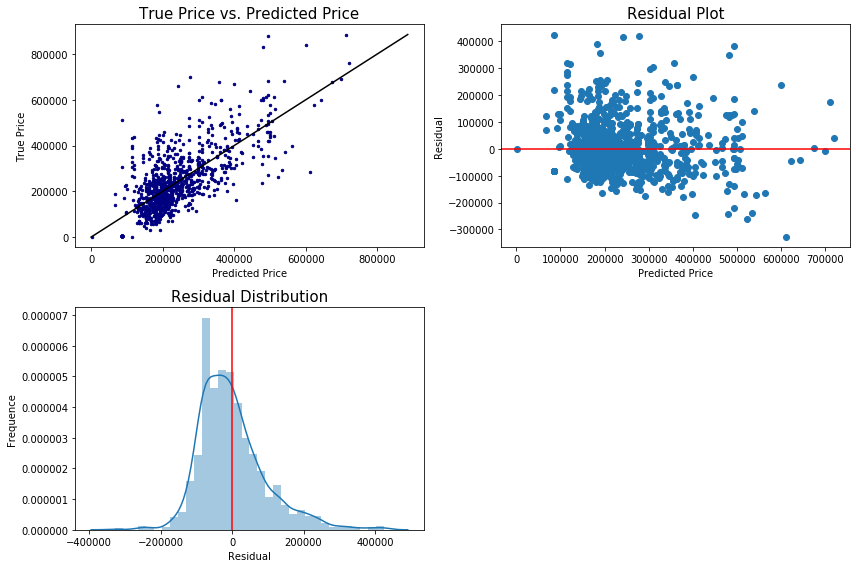

In [689]:
# Plot the model
plt.figure(figsize=(12,8))

# Generate a scatterplot of predicted values versus actual values.
plt.subplot(221)
plt.scatter(y_mlr, y, c='navy', s=6)
plt.xlabel("Predicted Price")
plt.ylabel("True Price")
plt.title("True Price vs. Predicted Price", size=15)

# This makes the 45 degree line
plt.plot([0, np.max(y)], [0, np.max(y)], c='k');

# Plot Errors Pattern:
plt.subplot(222)
residual = y - y_mlr
plt.scatter(y_mlr, residual)
plt.xlabel("Predicted Price")
plt.ylabel("Residual")
plt.axhline(0, c='red')
plt.title("Residual Plot", size = 15)

#Plot Errors Distribution:
plt.subplot(223)
sns.distplot(residual)
plt.xlabel("Residual")
plt.ylabel("Frequence")
plt.axvline(0, c='red')
plt.title("Residual Distribution", size = 15)

plt.tight_layout()
plt.show()

### 13. List the five assumptions for an MLR model. 

Indicate which ones are the same as the assumptions for an SLR model. 

**SLR AND MLR**:  

- *Linearity: Y must have an approximately linear relationship with each independent X_i.*
- *Independence: Errors (residuals) e_i and e_j must be independent of one another for any i != j.*
- *Normality: The errors (residuals) follow a Normal distribution.*
- *Equality of Variances: The errors (residuals) should have a roughly consistent pattern, regardless of the value of the X_i. (There should be no discernable relationship between X_1 and the residuals.)*

**MLR ONLY**:  
- *Independence Part 2: The independent variables X_i and X_j must be independent of one another for any i != j*





### 14. Pick at least two assumptions and articulate whether or not you believe them to be met  for your model and why.

In [ ]:
# INDEPENDENCE PART 2: I created a new feature: 'house_size_mix' to avoid using features that are not independent
# from each other (e.g., 'sq__ft', 'baths', and 'beds'). While it is difficult to keep all features completely
# independent, I used 'house_size_mix','city'(in dummy), and 'week_day'(in dummy) to minimizes the dependency 
# among features.

# EQUIALITY OF VARIANCE: based on the Residual Plot above, the variance shows inconsistent pattern (denser towards 
# lower predicted price. Therefore this assumption is not ideal for this model.

# NORMALITY: based on the Residual distribution plot, the MLR error is not perfectly normally distributed 
# (slightly right-skewed). But the distribution greatly improved from the SLR model.

### 15. [Bonus] Generate a table showing the point estimates, standard errors, t-scores, p-values, and 95% confidence intervals for the model you built. 

**Write a few sentences interpreting some of the output.**

> **Hint:** scikit-learn does not have this functionality built in, but statsmodels does in the `summary` method.  To fit the statsmodels model use something like the following.  There is one big caveat here, however!  `statsmodels.OLS` does _not_ add an intercept to your model, so you will need to do this explicitly by adding a column filled with the number 1 to your X matrix

```python
import statsmodels.api as sm

# The Default here is Linear Regression (ordinary least squares regression OLS)
model = sm.OLS(y,X).fit()
```

In [691]:
import statsmodels.api as sm

In [698]:
mlr_2 = sm.OLS(y,X).fit()

In [699]:
print(mlr_2.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.865
Model:                            OLS   Adj. R-squared:                  0.859
Method:                 Least Squares   F-statistic:                     140.8
Date:                Thu, 20 Jun 2019   Prob (F-statistic):               0.00
Time:                        16:42:00   Log-Likelihood:                -12723.
No. Observations:                 984   AIC:                         2.553e+04
Df Residuals:                     941   BIC:                         2.574e+04
Df Model:                          43                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
house_size_mix      4.5237      0.277     

In [700]:
# The results are very different from sklearn. 

---

> The material following this point can be completed after the first lesson on Tuesday.

---

### 16. Regression Metrics

Implement a function called `r2_adj()` that will calculate $R^2_{adj}$ for a model. 

In [671]:
# Function for calculating adjusted R2
def r2_adj(X, y):
    from sklearn.linear_model import LinearRegression
    model = LinearRegression()
    model.fit(X, y)
    r2 = model.score(X, y)
    n = len(y)
    k = len(X.columns)
    return 1 - ((1-r2)*(n-1)/(n-k-1))

In [672]:
r2_adj(X, y)

0.5129483025458106

### 17. Metrics, metrics, everywhere...

Write a function to calculate and print or return six regression metrics.  Use other functions liberally, including those found in `sklearn.metrics`.

In [673]:
# Funciton of calculating all six metrics
def six_metrics(X, y):
    from sklearn.linear_model import LinearRegression
    from sklearn import metrics
    model = LinearRegression()
    model.fit(X, y)
    y_pred = model.predict(X)
    residual = y - y_pred
    mae = metrics.mean_absolute_error(y, y_pred) # Mean Absolute Error
    rss = (residual**2).sum() # Residual Sum of Squares
    mse = metrics.mean_squared_error(y, y_pred) # Mean Square Error (close to 0 possible)
    rmse = np.sqrt(mse) # Root Mean Square Error (close to 0 possible)
    r2 = metrics.r2_score (y, y_pred) # R2
    r2_a = r2_adj(X, y) # Adjusted R2
    print(f'Mean Absolte Error (MAE): {mae}.')
    print(f'Residual Sum of Square (RSS): {rss}.')
    print(f'Mean Square Error (MSE): {mse}')
    print(f'Root Mean Square Error (RMSE): {rmse}')
    print(f'Coefficient of Determination (R2): {r2}')
    print(f'Adjusted R2: {r2_a}.')

### 18. Model Iteration

Evaluate your current home price prediction model by calculating all six regression metrics.  Now adjust your model (e.g. add or take away features) and see how to metrics change.

In [674]:
# Calculate 6 metrics with my final model
six_metrics(X, y)

Mean Absolte Error (MAE): 70292.11410944076.
Residual Sum of Square (RSS): 8773842547713.783.
Mean Square Error (MSE): 8916506654.180674
Root Mean Square Error (RMSE): 94427.25588610882
Coefficient of Determination (R2): 0.5342537175921281
Adjusted R2: 0.5129483025458106.


### 19. Bias vs. Variance

At this point, do you think your model is high bias, high variance or in the sweet spot?  If you are doing this after Wednesday, can you provide evidence to support your belief?

In [701]:
# At this point, I belive my model tend to have high variance (overfitting). Will need test data to verify this
# statement. The model should have relatively low bias.

In [702]:
from sklearn.model_selection import train_test_split, cross_val_score

In [706]:
cross_val_score(mlr, X, y, cv=5).mean()

-0.4582122064089635

In [ ]:
#What!!!?